In [5]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
legend_properties = {'weight':'bold'}

In [6]:
# Define more colors
# NUS two colors
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"

In [7]:
data_folder = r"E:\data\dao-0310-23\V4_4\Incentive_Strength_2"
incentive_strength_list = [1, 5, 10, 20, 40]
incentive_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
performance_across_strength_incentive, diversity_across_strength_incentive = [], []
for incentive in incentive_list:
    performance_across_strength, diversity_across_strength = [], []
    performance_across_repeat, diversity_across_repeat = [], []
    for index in range(1, 11):
        performance_file = data_folder + r"\dao_performance_across_strength_incentive_{0}_{1}".format(incentive, index)
        diversity_file = data_folder + r"\dao_diversity_across_strength_incentive_{0}_{1}".format(incentive, index)
        
        with open(performance_file, 'rb') as infile:
            performance = pickle.load(infile)
        with open(diversity_file, 'rb') as infile:
            diversity = pickle.load(infile)
        performance_across_repeat.append(performance)
        diversity_across_repeat.append(diversity)
    for i in range(len(performance_across_repeat[0])):
        performance_across_strength.append(sum([each[i] for each in performance_across_repeat]) / len(performance_across_repeat))
        diversity_across_strength.append(sum([each[i] for each in diversity_across_repeat]) / len(diversity_across_repeat))
    
    performance_across_strength_incentive.append(performance_across_strength)
    diversity_across_strength_incentive.append(diversity_across_strength)

print(performance_across_strength)

[0.7171495238095237, 0.7181488253968252, 0.7171052698412697, 0.7160563174603173, 0.7150994285714284]


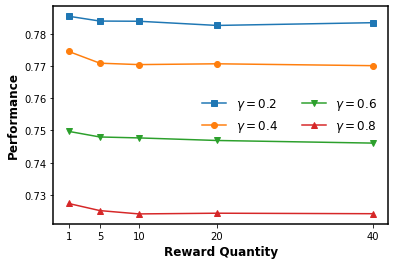

<Figure size 432x288 with 0 Axes>

In [14]:
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
# plt.plot(incentive_strength_list, performance_across_strength_incentive[0], "-s", label="$\\gamma={0}$".format(incentive_list[0]))
plt.plot(incentive_strength_list, performance_across_strength_incentive[1], "-s", label="$\\gamma={0}$".format(incentive_list[1]))
plt.plot(incentive_strength_list, performance_across_strength_incentive[3], "-o", label="$\\gamma={0}$".format(incentive_list[3]))
plt.plot(incentive_strength_list, performance_across_strength_incentive[5], "-v", label="$\\gamma={0}$".format(incentive_list[5]))
plt.plot(incentive_strength_list, performance_across_strength_incentive[7], "-^", label="$\\gamma={0}$".format(incentive_list[7]))
plt.xlabel('Reward Quantity', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
plt.xticks(incentive_strength_list)
plt.legend(frameon=False, ncol=2, fontsize=12)
plt.savefig(data_folder + r"\performance_across_incentive_strength.png", transparent=True, dpi=300)
plt.show()
plt.clf()